<a href="https://colab.research.google.com/github/marcelomj23/proprio/blob/main/Tech_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge Fase 2 - Machine Learning**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Dados**

In [19]:
#Carregando os Dados e tratando as informações
path_ibovespa = '/content/dados_ibovespa.csv'
df_ibv = pd.read_csv(path_ibovespa,parse_dates=['Data'], dayfirst=True, thousands='.', decimal=',')
df_ibv.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2022-12-29,109735,110237,111178,109560,"13,39M","-0,46%"
1,2022-12-28,110237,108578,110536,108578,"11,19M","1,53%"
2,2022-12-27,108578,108739,109353,107418,"11,16M","-0,15%"
3,2022-12-26,108738,109699,109755,108309,"5,22M","-0,87%"
4,2022-12-23,109698,107552,109994,107552,"12,85M","2,00%"


In [20]:
df_ibv.dtypes

Data        datetime64[ns]
Último               int64
Abertura             int64
Máxima               int64
Mínima               int64
Vol.                object
Var%                object
dtype: object

In [21]:
# Função para transformar a coluna `Vol.` de texto para números inteiros
def parse_vol(x):
  # Não faz nada caso não seja uma string
  if type(x) != str:
    return None

  # Multiplica por 1 milhão se possuí símbolo M ou por 1 mil se símbolo K
  multiplier = 1_000_000 if x.endswith('M') else 1_000

  # Remove o símbolo M ou K
  result = x[:-1]

  # Altera o separador para . ao invés de ,
  result = result.replace(',', '.')

  # Transforma a string em número
  result = float(result)

  # Multiplica o número pelo multiplicador e transforma em inteiro
  return int(result * multiplier)

In [22]:
# Função para transformar a coluna `Var%` de texto para número decimal
def parse_var(x):
  # Remove o símbolo de %
  result = x[:-1]

  # Altera o separador para . ao invés de ,
  result = result.replace(',', '.')

  # Transforma a string em número
  result = float(result)

  # Transforma em porcentagem
  return result / 100

In [23]:
# Cria um novo DataFrame
df_ibv2 = df_ibv.copy()
df_ibv2['Vol.'] = df_ibv2['Vol.'].apply(parse_vol)
df_ibv2['Var%'] = df_ibv2['Var%'].apply(parse_var)
df_ibv2 = df_ibv2.set_index('Data', drop=True)
df_ibv2.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2022-12-29,109735,110237,111178,109560,13390000.0,-0.0046
2022-12-28,110237,108578,110536,108578,11190000.0,0.0153
2022-12-27,108578,108739,109353,107418,11160000.0,-0.0015
2022-12-26,108738,109699,109755,108309,5220000.0,-0.0087
2022-12-23,109698,107552,109994,107552,12850000.0,0.0200


### **Gráficos - Análises**

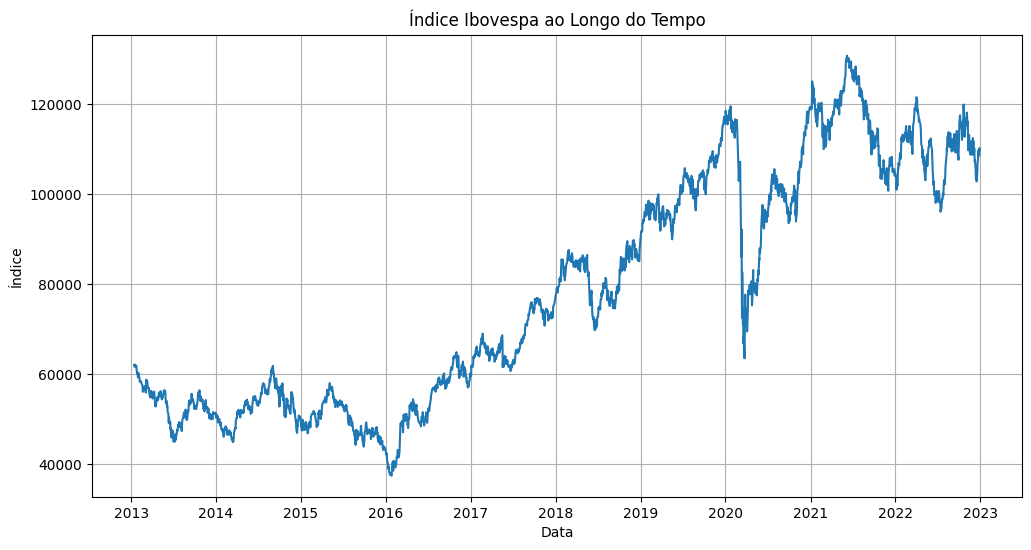

In [25]:
# Gráfico de linha para o Índice Ibovespa ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_ibv['Data'], df_ibv['Último'])
plt.title('Índice Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Índice')
plt.grid(True)
plt.show()


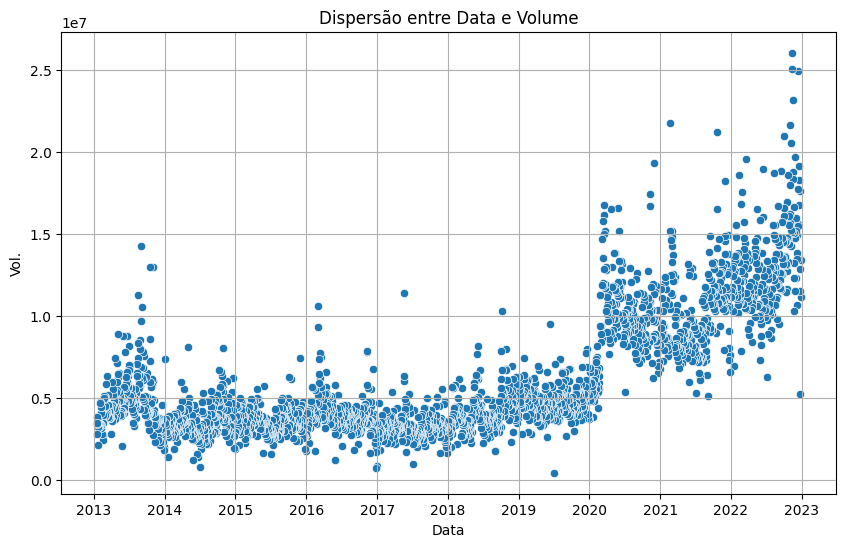

In [64]:
# Gráfico de dispersão entre Data e Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Data', y='Vol.', data=df_ibv2)
plt.title('Dispersão entre Data e Volume')
plt.xlabel('Data')
plt.ylabel('Vol.')
plt.grid(True)
plt.show()